In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('app_train_cleaned.csv')

df = df.loc[0:150000]

df

,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CLIENT_AGE,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_FAMILY_STATUS,AMT_CREDIT,AMT_INCOME_TOTAL,ORGANIZATION_TYPE,SK_ID_CURR,TARGET
0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,25.920548,10,WEDNESDAY,-2120,-3648.0,-9461,0.018801,Single / not married,406597.5,202500.0,Business Entity Type 3,100002,1
1,1.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,45.931507,11,MONDAY,-291,-1186.0,-16765,0.003541,Married,1293502.5,270000.0,School,100003,0
2,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,52.180822,9,MONDAY,-2531,-4260.0,-19046,0.010032,Single / not married,135000.0,67500.0,Government,100004,0
3,2.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,52.068493,17,WEDNESDAY,-2437,-9833.0,-19005,0.008019,Civil marriage,312682.5,135000.0,Business Entity Type 3,100006,0
4,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,54.608219,11,THURSDAY,-3458,-4311.0,-19932,0.028663,Single / not married,513000.0,121500.0,Religion,100007,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0.0,0.0,0.453845,315000.0,16888.5,2.0,-1472.0,31.956164,12,SATURDAY,-3,-5145.0,-11664,0.024610,Married,448056.0,112500.0,Business Entity Type 3,273885,0
149997,9.0,9.0,0.549067,945000.0,42138.0,3.0,-1103.0,43.427397,7,MONDAY,-3965,-9742.0,-15851,0.020713,Civil marriage,1169532.0,157500.0,Services,273886,0
149998,3.0,3.0,0.605923,180000.0,16096.5,2.0,-2007.0,36.772603,18,TUESDAY,-5416,-447.0,-13422,0.006629,Married,203760.0,157500.0,Government,273887,1
149999,1.0,1.0,0.648814,900000.0,39933.0,1.0,-2040.0,28.019178,10,THURSDAY,-2886,-10163.0,-10227,0.032561,Single / not married,1006920.0,202500.0,Self-employed,273888,0


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

for i in df.select_dtypes(include='object').columns:
    enc = OrdinalEncoder()
    #print(train_df[i])
    df[i].fillna(df[i].mode()[0], inplace=True)
    df[i]= enc.fit_transform(df[[i]])


#Standerization
scaler = StandardScaler()
app_train_scaled = scaler.fit_transform(df.drop(columns='TARGET'))
app_train_df = pd.DataFrame(app_train_scaled, index=df.index, columns=df.drop(columns='TARGET').columns)
app_train_df['TARGET'] = df['TARGET']
app_train_df

,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,CLIENT_AGE,HOUR_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_FAMILY_STATUS,AMT_CREDIT,AMT_INCOME_TOTAL,ORGANIZATION_TYPE,SK_ID_CURR,TARGET
0,0.229868,0.238749,-1.307550,-0.506337,-0.164928,-1.269187,-0.208193,-1.501937,-0.632537,1.354106,0.578104,0.377910,1.501937,-0.149337,1.312099,-0.477683,0.105387,-1.192108,-1.732572,1
1,-0.171740,-0.166433,0.565762,1.597921,0.588773,-0.170704,0.162020,0.169937,-0.326014,-0.969800,1.788444,1.076291,-0.169937,-1.253917,-0.402081,1.724193,0.317082,0.469711,-1.732552,0
2,-0.573349,-0.571616,0.219909,-1.090177,-1.395088,-1.269187,0.177748,0.692054,-0.939061,-0.969800,0.306125,0.204308,-0.692054,-0.784073,1.312099,-1.151965,-0.318005,-0.898846,-1.732532,0
3,0.229868,0.238749,0.712770,-0.652297,0.176766,-0.170704,0.417297,0.682669,1.513126,1.354106,0.368330,-1.376552,-0.682669,-0.929782,-1.259171,-0.710841,-0.106309,-1.192108,-1.732492,0
4,-0.573349,-0.571616,-0.995817,-0.068456,-0.359213,-1.269187,-0.174317,0.894858,-0.326014,0.424544,-0.307317,0.189841,-0.894858,0.564515,1.312099,-0.213523,-0.148648,0.371957,-1.732472,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,-0.573349,-0.571616,-0.312248,-0.603643,-0.700290,-0.170704,-0.617121,-0.997674,-0.019491,-0.505019,1.979027,-0.046735,0.997674,0.271142,-0.402081,-0.374756,-0.176875,-1.192108,1.730487,0
149997,3.041130,3.075029,0.184222,1.099224,1.030076,0.927779,-0.170688,-0.039276,-1.552107,-0.969800,-0.642823,-1.350739,0.039276,-0.010939,-1.259171,1.416417,-0.035744,0.665219,1.730507,0
149998,0.631477,0.643932,0.480660,-0.968544,-0.754566,-0.170704,-1.264388,-0.595270,1.819649,0.889325,-1.603022,1.285919,0.595270,-1.030395,-0.402081,-0.981258,-0.035744,-0.898846,1.730527,1
149999,-0.171740,-0.166433,0.704284,0.977591,0.878966,-1.269187,-1.304313,-1.326601,-0.632537,0.424544,0.071204,-1.470162,1.326601,0.846668,1.312099,1.012708,0.105387,0.616342,1.730547,0


In [6]:
X = app_train_df.drop(columns = ['TARGET'])
y = app_train_df['TARGET']

In [7]:
#Handeling Nan values on training set
# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

y = y.to_numpy(dtype=int)
y = y.reshape(-1, 1)

# Need to impute missing values
X = imputer.fit_transform(X)
y = imputer.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#Simple Logistic Regression Model just to see if this type of approach works

# instantiating the model
log_reg = LogisticRegression()
# parameters for grid search
param_grid = {'C': np.arange(0, 10, 1), "penalty":['none', 'l1', 'l2'], "solver":['newton-cg', 'liblinear', 'saga']} 


# inserting model in pipeline and fitting the data. Ideally, bit in this first case lets fit the logistic regression direectly
'''log_pipeline = Pipeline([
                    ('preprocessor', preprocess_pipeline), 
                    ('log_reg', log_reg)])'''



#we use GridSearchCV to automate the tuning of hyperparameters.
# grid search
logreg_cv=GridSearchCV(log_reg,param_grid,cv=5)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0, 'penalty': 'none', 'solver': 'newton-cg'}
accuracy : 0.9183583333333333


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score


logreg1= LogisticRegression(C=0 , penalty = 'none', solver = 'newton-cg', class_weight = 'balanced')
logreg1.fit(X_train,y_train)
y_test_predicted = logreg1.predict(X_test)

print(f'Precision score: {round(precision_score(y_test, y_test_predicted), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_test_predicted), 3)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_test_predicted), 3)}')
print(f'F1 score: {round(f1_score(y_test, y_test_predicted), 3)}')
print(f'AUC score: {round(roc_auc_score(y_test, y_test_predicted), 3)}')

Precision score: 0.138
Recall score: 0.61
Accuracy score: 0.655
F1 score: 0.225
AUC score: 0.635


In [15]:
logreg2= LogisticRegression(penalty = 'l2', solver = "sag", class_weight = {1:2})
logreg2.fit(X_train,y_train)
y_test_predicted = logreg2.predict(X_test)

print(f'Precision score: {round(precision_score(y_test, y_test_predicted), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_test_predicted), 3)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_test_predicted), 3)}')
print(f'F1 score: {round(f1_score(y_test, y_test_predicted), 3)}')
print(f'AUC score: {round(roc_auc_score(y_test, y_test_predicted), 3)}')

Precision score: 0.333
Recall score: 0.002
Accuracy score: 0.918
F1 score: 0.005
AUC score: 0.501


In [19]:
logreg3= LogisticRegression(penalty = 'l2', solver = "sag", class_weight = {1:15})
logreg3.fit(X_train,y_train)
y_test_predicted = logreg3.predict(X_test)

print(f'Precision score: {round(precision_score(y_test, y_test_predicted), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_test_predicted), 3)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_test_predicted), 3)}')
print(f'F1 score: {round(f1_score(y_test, y_test_predicted), 3)}')
print(f'AUC score: {round(roc_auc_score(y_test, y_test_predicted), 3)}')

Precision score: 0.117
Recall score: 0.757
Accuracy score: 0.511
F1 score: 0.203
AUC score: 0.623


<AxesSubplot:>

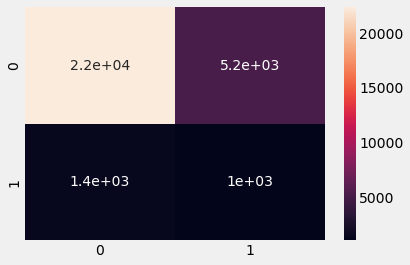

In [13]:
cf_matrix = confusion_matrix(y_test, y_test_predicted)
sns.heatmap(cf_matrix, annot=True)